In [44]:
from google.colab import files
uploaded = files.upload()

Saving reduced_rfe.csv to reduced_rfe (1).csv


In [45]:
import pandas as pd
model_super_df = pd.read_csv("reduced_rfe.csv")
model_super_df.head()

,PC1,PC2,PC3,PC4,PC5,num
0,1.056886,0.142561,-2.600496,1.342875,0.050053,0
1,-1.326260,1.587145,0.731607,0.421820,0.704721,2
2,2.536460,1.117879,0.113120,0.076922,0.263847,1
3,-1.590258,-0.653678,0.456804,1.536742,0.368943,0
4,-2.009211,0.566347,-1.179671,-0.391098,-0.499298,0


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
X= model_super_df.drop(columns=['num'])
y = model_super_df['num']
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.20, shuffle=True)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((242, 5), (61, 5), (242,), (61,))

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import pandas as pd
from sklearn.preprocessing import label_binarize
models_print ={
    "Logisitic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "SVM":SVC(kernel='linear')
}
models_print

{'Logisitic Regression': LogisticRegression(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'SVM': SVC(kernel='linear')}

In [49]:
model_result= {}
for name, model in models_print.items():
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    model_result[name]=accuracy_score(y_test,y_pred)
for name,acc in model_result.items():
    print(f"{name}:{acc}")

Logisitic Regression:0.4918032786885246
Decision Tree:0.5409836065573771
Random Forest:0.45901639344262296
SVM:0.45901639344262296


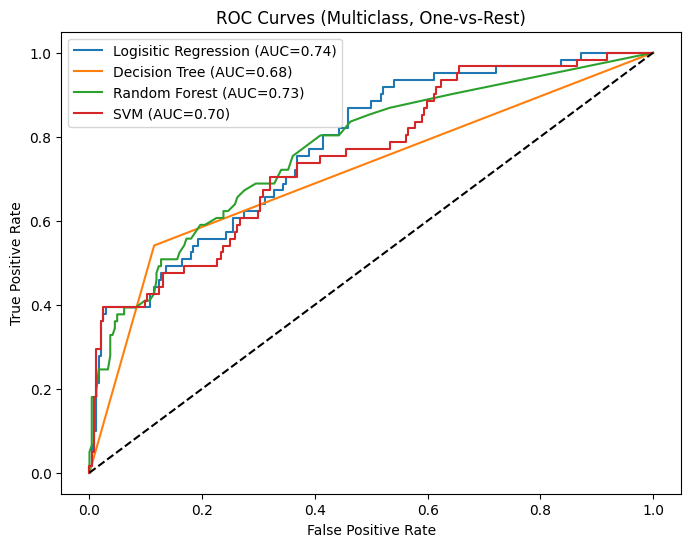

In [50]:
# Get unique classes
classes = sorted(y.unique())
n_classes = len(classes)

# Binarize target for ROC/AUC in multiclass
y_test_bin = label_binarize(y_test, classes=classes)

results = []
plt.figure(figsize=(8,6))

for name, model in models_print.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Probabilities (if available)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        # decision_function for models without predict_proba
        y_prob = model.decision_function(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # AUC for multiclass
    auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr", average="weighted")

    results.append([name, acc, pre, rec, f1, auc])
    # ROC Curve (macro-average)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

# Plot settings
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Multiclass, One-vs-Rest)")
plt.legend()
plt.show()


In [51]:
# Print metrics as DataFrame
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","AUC"])
results_df

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logisitic Regression,0.491803,0.401011,0.491803,0.408989,0.735441
1,Decision Tree,0.540984,0.489343,0.540984,0.508525,0.675668
2,Random Forest,0.459016,0.396423,0.459016,0.422945,0.726425
3,SVM,0.459016,0.375000,0.459016,0.388221,0.703522


In [52]:
import os

# Create folder 'results' if it doesn't exist
os.makedirs("results", exist_ok=True)

# Save the DataFrame as a txt file
with open("results/evaluation_metrics.txt", "w") as f:
    f.write(results_df.to_string(index=False))

print("✅ Results saved to results/evaluation_metrics.txt")

✅ Results saved to results/evaluation_metrics.txt


In [53]:
import os
import joblib

# Create folder if not exists
os.makedirs("models", exist_ok=True)

# Save each trained model with its name
for name, model in models_print.items():
    model.fit(X_train, y_train)
    file_path = f"models/{name.replace(' ', '_')}.pkl"
    joblib.dump(model, file_path)
    print(f"✅ Saved: {file_path}")

✅ Saved: models/Logisitic_Regression.pkl
✅ Saved: models/Decision_Tree.pkl
✅ Saved: models/Random_Forest.pkl
✅ Saved: models/SVM.pkl


In [54]:
# List only folders in the current directory
!ls -d */

# Check if a folder called "models" exists
!if [ -d "models" ]; then \
    echo "✅ Folder 'models' exists."; \
  else \
    echo "❌ Folder 'models' does not exist."; \
  fi

models/  results/  sample_data/
✅ Folder 'models' exists.


In [55]:
!ls -lh models/

total 1.3M
-rw-r--r-- 1 root root  18K Sep  7 16:31 Decision_Tree.pkl
-rw-r--r-- 1 root root 1.4K Sep  7 16:31 Logisitic_Regression.pkl
-rw-r--r-- 1 root root 1.3M Sep  7 16:31 Random_Forest.pkl
-rw-r--r-- 1 root root  18K Sep  7 16:31 SVM.pkl


In [56]:
!ls -d results

results


In [57]:
!ls -lh results/

total 4.0K
-rw-r--r-- 1 root root 344 Sep  7 16:31 evaluation_metrics.txt


In [58]:
!cat results/evaluation_metrics.txt

               Model  Accuracy  Precision   Recall       F1      AUC
Logisitic Regression  0.491803   0.401011 0.491803 0.408989 0.735441
       Decision Tree  0.540984   0.489343 0.540984 0.508525 0.675668
       Random Forest  0.459016   0.396423 0.459016 0.422945 0.726425
                 SVM  0.459016   0.375000 0.459016 0.388221 0.703522